# Manipulation Ontologies en python

## Owlready

In [ ]:
from owlready2 import *

In [ ]:
ontho = get_ontology("file:///home/mbunel/Documents/Ontologie/Relations_spatiales 7.owl")

In [ ]:
ontho.load()

In [ ]:
list(ontho.classes())

In [ ]:
sync_reasoner()

In [ ]:
close_world(ontho)

In [ ]:
aa = ontho.Relation_spatiale.instances()[0]

In [ ]:
list(aa.get_properties())

In [ ]:
[i.isPrepositionOf for i in ontho.Preposition.instances()]

In [ ]:
g = default_world.as_rdflib_graph()

In [ ]:
list(g.query(
    """SELECT * 
    WHERE {
        ?a a Ornitho:Relation_spatiale .
        ?b Ornitho:isPrepositionOf ?a .
    }"""))

In [ ]:
ontho.prep_PresDe.isPrepositionOf

## RDFLib

In [1]:
import rdflib
from rdflib import RDF, OWL

In [45]:
g = rdflib.Graph()
result = g.parse("/home/mbunel/Documents/Ontologie/Relations_spatiales 7.owl")

In [61]:
qres = g.query(
    """SELECT ?a ?b
       WHERE {
       ?a a Ornitho:Relation_spatiale ;
       Ornitho:hasRelationSpatialeAtomique ?b
       }
       """)

In [63]:
list(qres)

[(rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#rs_SousProcheDe'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_OrdreVerticalNegatif')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#rs_SousProcheDe'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_DistanceQuantitative')),
 (rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#rs_AuDessusAltitude'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_OrdreVerticalPositif'))]

In [ ]:
aa = g.triples((
    rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#hasGeographicObject'), 
    rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subPropertyOf'),
    None))

In [ ]:
aa = g.triples((
    rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#isPrepositionOf'), 
    None,
    None))

In [ ]:
for i in aa:
    print(i[1:], "\n")

In [ ]:
aa = g.triples((
    rdflib.term.BNode('N3ea5e8ce3cbf4a099c1947e01501d804'), 
    None,
    None))

for i in aa:
    print(i[1:], "\n")

## Surf

In [1]:
import surf

In [2]:
store = surf.Store(reader='rdflib',writer='rdflib',rdflib_store='IOMemory')
session = surf.Session(store)
store.load_triples(source="/home/mbunel/Documents/Ontologie/Relations_spatiales 7.owl")

True

In [4]:
aa = session.get_class('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale_atomique')

In [20]:
for a in aa.all():
    print(a)

{http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_OrdreVerticalPositif : http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale_atomique}
{http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_DistanceQuantitative : http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale_atomique}
{http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_OrdreVerticalNegatif : http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale_atomique}
{http://www.semanticweb.org/mbunel/ontologies/Ornitho#rsa_Contact : http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale_atomique}


## Code manipulation ontologie

In [ ]:
class _RDFMeta(type):
    
    def __new__(cls, name, bases, dct):
        
        def __init__(cls, graph):
            super(bases[0], cls).__init__(graph)
        
        dct["__init__"] = __init__
        
        return super().__new__(cls, name, bases, dct)

In [ ]:
class Ontology(object):
    
    def __init__(self, graph):
        self.graph = graph
        
        # Construction des classes
        self._ontologyclasses = {}
        
        # On appele le constructeur de classe pour chaque classe de l'ontologie
        for a in g.triples((None, RDF.type , OWL.Class)):
            self.RdfClassConstructor(a[0])
        

        if False:
            self.propertyConstructor()
        
    def append(self):
        pass
    
    
    def uriToName(self, uri, *args, **kwargs):

        uriDelimiter = kwargs.get("uriDelimiter", "#")

        swich = {
            rdflib.term.URIRef: lambda x: x.partition(uriDelimiter)[2],
            rdflib.term.BNode : lambda x: x.toPython()
        }

        return swich.get(type(uri), None)(uri)
    
      
    def _subClassConstructor(self, uri):
        
        # Définition uri subClass
        rdf_subClassOf_uri = rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')
        
        # Extraction des objets qui sont des sous-classes de la
        # classe traitée
        subclasses = g.triples((uri, rdf_subClassOf_uri, None))
        subclasses_instances = []

        for subclass in subclasses:
            # Récupération de l'uri des sous-classes
            subclass_uri = subclass[2]
            # Création du nom
            subclass_name = self.uriToName(subclass_uri)

            # Si la classe n'existe pas on la crée
            if subclass_name not in self._ontologyclasses:
                print(subclass_name)
                self.RdfClassConstructor(subclass_uri)

            # Ajout de la classe créée dans le dictionnaire des attribus
            if subclass_name not in subclasses_instances:
                subclass_instance = self._ontologyclasses.get(subclass_name, None)
                subclasses_instances.append(subclass_instance)
            else:
                raise Exception("fuck")
                
        return subclasses_instances
    
    def _supClassConstructor(self, cls):
        # Ajout des supclass
        for supClass in cls.supClasses:
            supClass.subClasses.append(cls)
    
    def RdfClassConstructor(self, uri):
        
        # Nom de la classe
        name = self.uriToName(uri)
        
        print("%s constructor" % (name,))
        
        if name == "Modifieur":
            # import ipdb; ipdb.set_trace()
            pass
    
        # Attributs de la classe
        dct = {
            "uri": uri,
            "subClasses": [],
            "supClasses": []
        }

        subclasses_instances = self._subClassConstructor(uri)
        dct["supClasses"].extend(subclasses_instances)

        # Création de la classe
        newclass = type(name, (OwlClass,), dct)
        # Ajout de la classe dans le dictionnaire des classes
        if name in self._ontologyclasses:
            raise Exception
        self._ontologyclasses[name] = newclass
        
        # Ajout des supclass
        #self._supClassConstructor(newclass)
        
    def propertyConstructor(self):
                
        self._ontologyproperties = {}
        
        rdf_subPropertyOf_uri = rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subPropertyOf')
        rdf_domain_uri = rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#domain')
        rdf_range_uri = rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#range')
        
        def _propertyConstructor(uri):

            name = self.uriToName(uri)
            

            dct = {
                "uri": uri,
                "subPropertyOf": set(),
                "supPropertyOf": set(),
                "domain": set(),
                "range" : set()
            }
                     
            # Range
            try:
                property_range = list(zip(*g.triples((uri, rdf_range_uri , None))))[-1]
            except IndexError:
                property_range = []
            property_range = {self._ontologyclasses[self.uriToName(i)] for i in property_range}
            dct["range"] = property_range
                
            # Domain
            try:
                property_domain = list(zip(*g.triples((uri, rdf_domain_uri , None))))[-1]
            except IndexError:
                property_domain = []
            property_domain = {self._ontologyclasses[self.uriToName(i)] for i in property_domain}            
            dct["domain"] = property_domain
            
            
            # subProperty 
            subproperties = g.triples((uri, rdf_subPropertyOf_uri, None))
            for subproperty in subproperties:
                subproperty_uri = subproperty[2]
                subproperty_name = self.uriToName(subproperty_uri)
                if not subproperty_name in self._ontologyproperties:
                    _propertyConstructor(subproperty_uri)                
                dct["subPropertyOf"].add(self._ontologyproperties[subproperty_name])
            
            
            # Class generation
            newproperty = type(name, (OwlObjectProperties,), dct)
            self._ontologyproperties[name] = newproperty

            if name == "Ne96da701cd694c86b11921230eb401a2":
                #import ipdb; ipdb.set_trace()
                pass
                
            # supProperty
            for supProperty in newproperty.subPropertyOf:
                supProperty.supPropertyOf.add(newproperty)
            
    
        for a in g.triples((None, RDF.type , OWL.ObjectProperty)):
            _propertyConstructor(a[0])

In [ ]:
class OwlThing(object):

    @classmethod
    def predicate_objects(cls):
        return g.predicate_objects(cls.uri)

In [ ]:
class OwlClass(OwlThing):
    subClassOf = []

In [ ]:
class OwlObjectProperties(OwlThing):
    pass

In [ ]:
class OwlNamedEntity(OwlThing):
    pass

### Ontologie module

In [ ]:
cd ~/Documents/Code/Ruitor/src/

In [ ]:
from ontoloyTools import ontology

In [ ]:
import rdflib
from rdflib import RDF, OWL

In [ ]:
g = rdflib.Graph()
result = g.parse("/home/mbunel/Documents/Ontologie/Relations_spatiales 7.owl")

In [ ]:
ontology.Ontology(g)

In [ ]:
from pycallgraph2 import PyCallGraph
from pycallgraph2.output import GraphvizOutput

with PyCallGraph(output=GraphvizOutput()):
    Ontology(g)

from IPython.display import Image
Image("pycallgraph.png")

In [ ]:
Ornitho = Ontology(g)

In [ ]:
Ornitho._ontologyclasses

In [ ]:
import trace
import sys

# create a Trace object, telling it what to ignore, and whether to
# do tracing or line-counting or both.
tracer = trace.Trace()

# run the new command using the given tracer
tracer.run('Ontology(g)')

# make a report, placing output in the current directory
r = tracer.results()

In [ ]:
ls

In [ ]:
Ornitho._ontologyclasses["Mot"].subClasses

In [ ]:
Ornitho._ontologyclasses['Modifieur'].supClasses

In [ ]:
rdf_subClassOf_uri = rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')
mot_uri = rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Mot')

list(g.triples((None, rdf_subClassOf_uri, mot_uri)))

In [ ]:
from graphviz import Digraph

In [ ]:
dot = Digraph()

for i in Ornitho._ontologyclasses.items():
    dot.node(str(i[1]), str(i[1]))
    
for i in Ornitho._ontologyclasses.items():
    sb = i[1].subClasses
    for j in sb:
        dot.edge(str(i[1]), str(j), "supC")

for i in Ornitho._ontologyclasses.items():
    sb = i[1].supClasses
    for j in sb:
        dot.edge(str(i[1]), str(j), "subC")   
    
dot

In [ ]:
dot = Digraph()

for i in Ornitho._ontologyproperties.items():
    dot.node(str(i[1]), str(i[1]))
    
for i in Ornitho._ontologyproperties.items():
    sb = i[1].subPropertyOf
    dot.edges([(str(i[1]), str(j)) for j in sb])

for i in Ornitho._ontologyproperties.items():
    sb = i[1].supPropertyOf
    dot.edges([(str(i[1]), str(j)) for j in sb])    
    
dot

In [ ]:
tt

In [ ]:
for i in tt:
    print("%s :" % i)
    print("\t sub : %s" % [a for a in i.subPropertyOf])
    print("\t sup : %s\n" % [a for a in i.supPropertyOf])

In [ ]:
tt[9].domain[0].subClassOf

In [ ]:
for i in tt:
    print("%s :" % i)
    print("\t sub : %s" % i.subClassOf)
    print("\t sup : %s\n" % i.supClassOf)

In [ ]:
rdflib.term.BNode('N4e37e053544744228138316ad2fe7276').toPython()

In [ ]:
list(tt.transitive_subjects(rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')))

In [ ]:
Ornitho._ontologyclasses["Relation_spatiale_atomique"].supClassOf

In [ ]:
g.triples((uri, OWL.subclass, None))

In [ ]:
aa = {1: "1"}

In [ ]:
"1" in aa

In [ ]:
hasGeographicObject.

In [ ]:
tt = hasGeographicObject()

In [ ]:
GeographicObject.

In [ ]:
Ornitho._ontologyproperties

In [ ]:
list(isRelationSpatialeAtomiqueOf.predicate_objects())

In [ ]:
Relation_spatiale_atomique.uri

## Classes manipulation ontologies

In [ ]:
class OrnithoObject:
    pass

## Bases de code

In [27]:
import os
from itertools import product, islice
from functools import partial
from more_itertools import chunked
#from operator import mul

import numpy as np
import numpy.ma as ma
import rasterio
from rasterio.windows import Window

from matplotlib import pyplot

import fiona
from  scipy import spatial
from shapely.geometry import mapping, LineString
from math import sqrt, ceil

In [2]:
def import_raster(name, folder=os.getcwd()):
    file = os.path.join(folder, name)
    return rasterio.open(file)

In [3]:
def import_shp(name, folder=os.getcwd()):
    file = os.path.join(folder, name)
    return fiona.open(file)

In [4]:
def write_raster(matrice, params, counter):

    with rasterio.open(
            '/media/mbunel/MULTIMEDIA/OutAlgo/gen_rig_tt%s.tif' % (
                counter,), 'w',
            driver='GTiff',
            width=params.width,
            height=params.height,
            count=1, dtype=matrice.dtype,
            crs=rasterio.crs.CRS(init='epsg:2154'),
            transform=params.transform) as dst:

        dst.write(matrice)

In [25]:
mask = [{'type': 'Polygon', 'coordinates': [[
    [942563.72516556282062083, 6448884.12251655571162701], 
    [942528.95695364230778068, 6446705.31456953566521406], 
    [944904.78476821188814938, 6446705.31456953566521406], 
    [944719.35430463566444814, 6448872.53311258275061846], 
    [942563.72516556282062083, 6448884.12251655571162701]]]
       }]

In [113]:
ligne_dist = import_raster(
    "dist_1", "/home/mbunel/Documents/Code/ExtensionRIG")
ligne_dist_mat = ligne_dist.read()

ligne_dalt = import_raster(
    "dalt_1", "/home/mbunel/Documents/Code/ExtensionRIG")
ligne_dalt_mat = ligne_dalt.read()

bati_dist = import_raster(
    "dist_2", "/home/mbunel/Documents/Code/ExtensionRIG")
bati_dist_mat = bati_dist.read()

bati_dalt = import_raster(
    "dalt_2", "/home/mbunel/Documents/Code/ExtensionRIG")
bati_dalt_mat = bati_dalt.read()

In [114]:
alt = import_raster("RGEALTI_38_test.vrt","/home/mbunel/Données/RGEALTI/RGEALTI_2-0_5M_ASC_LAMB93-IGN69_D038_2017-05-20/")

In [73]:
alt.meta

{'count': 1,
 'crs': None,
 'driver': 'VRT',
 'dtype': 'float32',
 'height': 20000,
 'nodata': -99999.0,
 'transform': Affine(5.0, 0.0, 864997.5,
       0.0, -5.0, 6500002.5),
 'width': 21000}

In [115]:
wnd=Window(5000, 10000, 15000, 15000)

In [116]:
alt_mat = alt.read(window=wnd)

In [132]:
fuzz = FuzzyRaster(raster=alt,
                   fuzzyfication_parameters=[(1500, 1.0), (3000, 0.0)],window=wnd)

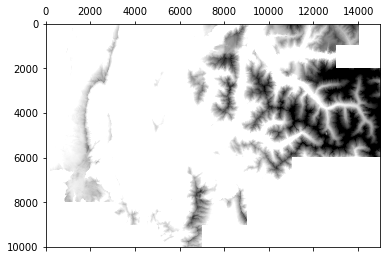

In [134]:
fuzz

In [7]:
def rasterize(vector, raster):

    vector_geom = vector.schema['geometry']

    params = raster_params(vector, raster)
    raster_out = raster_gen(params)

    if vector_geom == "3D LineString":
        seg = line_segmentize(vector, raster)
        out = _rasterize_3DSegments(seg, raster_out, params)

    if vector_geom == "3D Polygon":
        seg = polygon_segmentize(vector, raster)
        print(seg)
        out = _rasterize_3DPolygons(vector, raster, raster_out)

    return out, params['transform']

In [8]:
def raster_params(vector, raster):
    # Génération raster
    bbox = (vector.bounds[:2], vector.bounds[2:])
    # x,y -> row, col
    row_ind, col_ind = zip(*map(lambda x: raster.index(*x), bbox))
    row_min, col_min = min(row_ind), min(col_ind)
    row_num = abs(max(row_ind) - row_min) + 10
    col_num = abs(max(col_ind) - col_min) + 10

    sommet = raster.xy(row_min, col_min, 'ul')

    transform = rasterio.transform.from_origin(
        sommet[0] + 2.5,
        sommet[1],
        5, 5)
    
    # Définition des paramètres du raster
    params = {
        'sommet': sommet,
        'params': raster.transform,
        'transform': transform,        
        'row_num': row_num, 'col_num': col_num
    }
    return params

In [9]:
def raster_gen(params):
    # Creation Raster sortie
    print("\nRaster creation:")

    # numpy array est au format lignes, col
    structure = (params['row_num'], params['col_num'])
    raster_out = np.zeros(structure)

    # Affichage structure
    for a in zip(['row', 'col'], structure):
        print("\t%s: %s" % (*a,))

    return raster_out

In [10]:
def _rasterize_3DSegments(segments, raster, params):
    # Peuplement raster
    print("\nRaster calculation:\n")
    for s in segments:
        # calcul coordonées moyennes segment
        # Format (x,y,z)
        cent = tuple(map(lambda x: sum(x) / 2, zip(*s)))

        d_row = cent[1] - params['sommet'][1]
        d_col = cent[0] - params['sommet'][0]

        row = d_row // params['params'][4]
        col = d_col // params['params'][0]

        if False:
            print("\tx: %s, y: %s, z: %s" % (*cent,))
            print("\tdx: %s, dy: %s" % (d_col, d_row))
            print("\tcol: %s, row: %s\n" % (col, row))

        try:
            raster[row, col] = cent[2]
        except IndexError:
            print(raster.shape)

    return raster

In [11]:
def _rasterize_3DPolygons(polygons, raster, params):
    # Peuplement raster
    print("\nRaster calculation:\n")
    import ipdb; ipdb.set_trace()

    return raster

In [12]:
def polygon_segmentize(polygons, raster):    
    fun = map(lambda x: ''.join(x), product(('u', 'l'), ('l', 'r')))
    
    row_res, col_res = raster.res
    
    cutpoly =[]
    
    import ipdb; ipdb.set_trace()
    
    for p in polygons:
        geom = p['geometry']['coordinates']
        extrem_coords = [(min(i), max(i)) for i in zip(*geom[0])]
        bbox = product(*extrem_coords[:2])
        bbox_pixels = map(lambda x: raster.index(*x), bbox)
        points = [raster.xy(*i, f) for i, f in zip(bbox_pixels, fun)]
        
        # Génération des lignes
        y = np.arange(points[0][0], points[2][0] + row_res, row_res)
        x = np.arange(points[2][1], points[0][1] + col_res, col_res)

        row_lines = [((j, points[2][1]), (j, points[0][1])) for j in y]
        col_lines = [((points[1][0], i), (points[0][0], i)) for i in x]
        # Lignes de haut en bas, puis colonnes de gauche à droite
        out = (*row_lines, *col_lines)

        cutpoly.extend(out)
        
    return cutpoly

In [13]:
def emp(line_coords, raster):
    """

    line_coords: un segment de ligne
    """
    # no col et ligne
    row_ind, col_ind = zip(*map(lambda x: raster.index(*x[:2]), line_coords))

    bbox_pixels = product(sorted(row_ind), sorted(col_ind))
    # Génére ('ul','ur', 'll','lr') de façon offuquée
    fun = map(lambda x: ''.join(x), product(('u', 'l'), ('l', 'r')))
    points = [raster.xy(*i, f) for i, f in zip(bbox_pixels, fun)]

    # Génération des lignes
    row_res, col_res = raster.res
    y = np.arange(points[0][0], points[1][0] + row_res, row_res)
    x = np.arange(points[2][1], points[0][1] + col_res, col_res)

    row_lines = [((j, points[2][1]), (j, points[0][1])) for j in y]
    col_lines = [((points[1][0], i), (points[0][0], i)) for i in x]
    # Lignes de haut en bas, puis colonnes de gauche à droite
    out = (*row_lines, *col_lines)
    return out

In [14]:
def line_segmentize(line, raster):
    
    cutline = []

    for l in line:
        geom_line = l['geometry']['coordinates']
        # segmentation lignes
        seg = zip(geom_line[:-1], geom_line[1:])
        # couper lignes
        for s in seg:
            pi_limits = emp(s, raster)
            intersect = cut_segment(s, pi_limits)
            # Curryfication fonction tri
            dist_sort = partial(point_dist, point2=s[0][:2])
            # Tri
            intersect.sort(key=dist_sort)
            # Calcul altitude
            intersect_alt = interpolate_altitude(intersect, s)
            extend_seg = (s[0], *intersect_alt, s[1])

            # A revoir
            segment_out = zip(extend_seg[:-1], extend_seg[1:])
            cutline.extend(segment_out)

    return cutline

In [15]:
def interpolate_altitude(points, seg_ref):
    cdir = (seg_ref[1][2] - seg_ref[0][2]) / point_dist(*seg_ref)
    abord = seg_ref[0][2]
    out = ((*p, point_dist(p, seg_ref[0]) * cdir + abord) for p in points)
    return out

In [16]:
def cut_segment(segment, cut):
    seg_out = []

    for c in cut:
        inter = segments_intersection(segment, c)
        if inter:
            seg_out.append(inter)
    return seg_out

In [17]:
def point_dist(point1, point2):
    carres = [(i-j)**2 for i, j in zip(point1, point2)]
    dist = sqrt(sum(carres))
    return dist

In [18]:
def segments_intersection(seg0, seg1):
    """
    Calcule le point d'intersection de deux segments
    """
    (p0_x, p0_y, *_), (p1_x, p1_y, *_) = seg0

    (p2_x, p2_y, *_), (p3_x, p3_y, *_) = seg1

    s1_x = p1_x - p0_x
    s1_y = p1_y - p0_y
    s2_x = p3_x - p2_x
    s2_y = p3_y - p2_y

    s = (-s1_y * (p0_x - p2_x) + s1_x * (p0_y - p2_y)) / \
        (-s2_x * s1_y + s1_x * s2_y)
    t = (s2_x * (p0_y - p2_y) - s2_y * (p0_x - p2_x)) / \
        (-s2_x * s1_y + s1_x * s2_y)

    if (s >= 0 and s <= 1 and t >= 0 and t <= 1):
        i_x = p0_x + (t * s1_x)
        i_y = p0_y + (t * s1_y)
        return (i_x, i_y)
    else:
        return None

In [19]:
def segment_add_point(seg, point):
    """
    Fait passer un segment par un point intermédiaire
    """
    seg1, seg2 = (seg[0], point), (point, seg[1])
    return [seg1, seg2]

In [20]:
raster = import_raster(
    "out.tif", "/home/mbunel/Documents/Code/thesis/data")
line = import_shp("TELEPHERIQUE_MARMOTTES.shp",
                  "/home/mbunel/Documents/Code/thesis/data")
polygone = import_shp("BATI_TELEPH_MARMOTTES_FUS.shp",
                      "/home/mbunel/Documents/Code/thesis/data")

In [ ]:
# Création ligne
from rasterio import features

features.rasterize(shapes=polygone[1], transform=raster.transform)

In [ ]:
#import ipdb; ipdb.set_trace()
features.rasterize(shapes=polygone[0]['geometry'])

In [ ]:
tt = list(enumerate([i['geometry'] for i in polygone]))
id, ab = tt[0]
print(tt[0])
features.rasterize(shapes=tt)

In [ ]:
raster.meta

In [ ]:
features.is_valid_geom(tt[0][1])

In [21]:
out, transform = rasterize(line, raster)


Raster creation:
	row: 571
	col: 655

Raster calculation:



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
pyplot.matshow(out)

Base de code pour les classes fonctions (gardé pour l'historique)

In [ ]:
class Fuzzyfier:
            
    def __init__(self, context):
        self.context = context
        
    def fuzzyfy(self, *args, **kwargs):
        
        vfun = self.def_fuzzyfy_function(*args, **kwargs)
        self.context.fuzzycomputeraster = vfun(self.context.computeraster)
        self.context.fuzzycomputed = 1

    def def_fuzzyfy_function(self, *args, **kwargs):
    
        sorted(args, key=lambda x: x[0])
        
        # Définition de la fonction
        # Todo réduire à l'occasion
        if len(args) == 2:
            def fun(x):
                if x < args[0][0]:
                    out = args[0][1]
                elif x < args[1][0]:
                    a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
                    b = -(args[0][0] * a - args[0][1])
                    out = a*x + b
                else:
                    out = args[1][1]
                return out           
        elif len(args) == 3:      
            def fun(x):
                if x < args[0][0]:
                    out = args[0][1]
                elif x < args[1][0]:
                    a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
                    b = args[0][1]
                    out = a*x + b
                elif x < args[2][0]:
                    a = (args[2][1] - args[1][1]) / (args[2][0] - args[1][0])
                    b = args[1][1]
                    out = a*x + b
                else:
                    out = args[1][1]
                return out
        elif len(args) == 4:
            def fun(x):
                if x < args[0][0]:
                    out = args[0][1]
                elif x < args[1][0]:
                    a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
                    b = args[0][1]
                    out = a*x + b
                elif x < args[2][0]:
                    out = args[2][1]
                elif x < args[3][0]:
                    a = (args[3][1] - args[2][1]) / (args[3][0] - args[2][0])
                    b = args[2][1]
                    out = a*x + b
                else:
                    out = args[3][1]
                return out
        else:
            raise ValueError("2, 3 or 4 values accepted")
                
        vfun = np.vectorize(fun)
        
        return vfun

In [ ]:
class FonctionSpatialisation:
    
    default_fuzzyfier_strategy = Fuzzyfier
    
    def __init__(self, raster, fuzzyfier_strategy=None, *args, **kwargs):
        self.raster = raster
        self.computeraster = np.empty_like(raster)
        self.computed = 0
        self.fuzzycomputeraster = np.empty_like(raster)
        self.fuzzycomputed = 0
        
        if fuzzyfier_strategy:
            self.fuzzyfier = fuzzyfier_strategy(self)
        else:
            self.fuzzyfier = self.default_fuzzyfier_strategy(self)
        
    def compute(self, *args, **kwargs):
        print(args, kwargs)
        self._compute_function(*args, **kwargs)
        self.fuzzyfy(*args, **kwargs)
        
    def fuzzyfy(self, *args, **kwargs):
        self.fuzzyfier.fuzzyfy(*args, **kwargs)
    
    def _compute_function(self, *args, **kwargs):
        raise ValueError("No compute function")

In [ ]:
class DistanceQuantitativeFloue(FonctionSpatialisation):
    """
    Prend un raster en entrée et renvoie un raster de distance floue
    
    Pour chaque cellule du raster on calcule la distance à la cellule
    non-vide la plus proche. La valeur de la distance est donnée en cellules.
    """
    
    def __init__(self, raster, *args, **kwargs):
        super().__init__(raster, *args, **kwargs)

    def _compute_function(self, *args, **kwargs):
        # Extraction des cellules non nulles
        notnullcells = np.argwhere(self.raster != 0)
        
        # Définition de l'itérateur
        it = np.nditer(self.raster, flags=['multi_index'])
        while not it.finished:
            # Calcul de la distance au plus proche voisin
            self.computeraster[it.multi_index] = np.sqrt(np.min(np.sum(np.square(notnullcells - it.multi_index),axis=1)))
            it.iternext()

In [ ]:
aa = DistanceQuantitativeFloue(out)

In [ ]:
aa.compute((10,1.0),(100,0.0))

In [ ]:
pyplot.matshow(aa.fuzzycomputeraster)

In [ ]:
class AltitudeQuantitativeFloue(FonctionSpatialisation):
    
    def __init__(self, raster, *args, **kwargs):
        super().__init__(raster, *args, **kwargs)

    def _compute_function(self, *args, **kwargs):
        pass

## Définition de la classe FuzzyRaster et de ses composantes

### Définition des opérateurs flous

In [100]:
class FuzzyOperators:
    def __init__(self, context):
        self.context = context
        
    def _check_operators(self, other):
        if type(self.context.fuzzy_operators) != type(other.fuzzy_operators):
            raise ValueError("Incompatibles Fuzzy Operators")
            
    def __str__(self):
        return "fuzzy operator : %s" % (self.__class__.__name__)      

    def norm(self, other):
        self._check_operators(other)
        return self._norm(other)    
    
    def conorm(self, other):
        self._check_operators(other)
        return self._conorm(other)
        
    def _norm(self, other):
        raise ValueError("No t-norm defined")
        
    def _conorm(self, other):
        raise ValueError("No t-norm defined")

In [101]:
class ZadehOperators(FuzzyOperators):
    """
    Opérateurs flous tels que formalisés par zadeh
    
    t-norme(a,b) = min(a,b)
    t-conorme(a,b) = max(a,b)
    """
    
    def __init__(self, context):
        super().__init__(context)
        
    def _norm(self, other):
        return np.minimum(self.context.values, other.values)
    
    def _conorm(self, other):
        return np.maximum(self.context.values, other.values)

In [102]:
class LukasiewiczOperators(FuzzyOperators):
    """
    Opérateurs flous tels que formalisés par Lukasiewicz
    
    t-norme(a,b) = max(a+b-1, 0)
    t-conorme(a,b) = min(a+b, 1)
    """
    
    def __init__(self, context):
        super().__init__(context)
        
    def _norm(self, other):
        return np.maximum(self.context.values + other.values - 1.0, 0.0)
    
    def _conorm(self, other):
        return np.minimum(self.context.values + other.values, 1.0)

In [103]:
class ProbabilityOperators(FuzzyOperators):
    """
    Opérateurs probabilistes flous
    
    t-norme(a,b) = a*b
    t-conorme(a,b) = a+b-a*b
    """
    
    def __init__(self, context):
        super().__init__(context)
        
    def _norm(self, other):
        return self.context.values * other.values
    
    def _conorm(self, other):
        return self.context.values + other.values - self.context.values * other.values

In [104]:
class NilpotentOperators(FuzzyOperators):
    """
    Opérateurs nilpotents
    
    t-norme(a,b) = min(a,b) si a+b > 1; 0 sinon
    t-conorme(a,b) = max(a,b) si a+b < 1; 1 sinon
    """
        
    def __init__(self, context):
        super().__init__(context)
        
    def _norm(self, other):
        # Définirion de l'array a renvoyer
        res_array = np.empty_like(self.context.values)
        # Construction de l'array test: True si a + b > 1
        test_arr = self.context.values + other.values  > 1
        # 0 si a+b <= 0
        res_array[~test_arr] = 0
        # min(a,b) si a+b > 1
        res_array[test_arr] = np.minimum(self.context.values, other.values)[test_arr]
        
        return res_array
    
    def _conorm(self, other):
        # Définirion de l'array a renvoyer
        res_array = np.empty_like(self.context.values)
        # Construction de l'array test: True si a + b < 1
        test_arr = self.context.values + other.values < 1
        # 1 si a + b >= 1
        res_array[~test_arr] = 1
        # max(a,b) si a+b < 1
        res_array[test_arr] = np.maximum(self.context.values, other.values)[test_arr]
        
        return res_array

In [105]:
class DrasticOperators(FuzzyOperators):
    """
    Opérateurs drastiques
    
    t-norme(a,b) = b si a = 1; a si b = 1; 0 sinon
    t-conorme(a,b) = b si a = 0; a si b = 0; 1 sinon
    """
        
    def __init__(self, context):
        super().__init__(context)
        
    def _norm(self, other):
        # Définirion de l'array a renvoyer
        res_array = np.empty_like(self.context.values)
        # Construction des arrays test, a == 1 & b == 1
        test_arr_self = self.context.values == 1
        test_arr_other = other.values == 1
        # b si a == 1 b & a si b == 1
        res_array[test_arr_self] = other.values[test_arr_self]
        res_array[test_arr_other] = self.context.values[test_arr_other]
        # 0 si a != 1 ou b != 1 i.e. tous les autres cas
        res_array[~(test_arr_self | test_arr_other)] = 0
        
        return res_array
    
    def _conorm(self, other):
        # Définirion de l'array a renvoyer
        res_array = np.empty_like(self.context.values)
        # Construction des arrays test, a == 0 & b == 0
        test_arr_self = self.context.values == 0
        test_arr_other = other.values == 0
        # b si a == 0 b & a si b == 0
        res_array[test_arr_self] = other.values[test_arr_self]
        res_array[test_arr_other] = self.context.values[test_arr_other]
        # 1 si a != 0 ou b != 0 i.e. tous les autres cas
        res_array[~(test_arr_self | test_arr_other)] = 1
        
        return res_array

### Tracé fonction opérateurs flous

In [106]:
def plot(self, other):

    class empty:
        pass

    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)

    X, Y = np.meshgrid(x, y)

    a = empty()
    b = empty()

    a.values = X
    b.values = Y
    self.context= a
    Z = self._conorm(b)

    fig = pyplot.figure()
    ax = pyplot.axes(projection='3d')
    ax.plot_wireframe(X, Y, Z, color='black')
    ax.set_title('wireframe');

    ax.invert_xaxis()

    #ax.view_init(30, 180)
    
FuzzyOperators.plot = plot

### Définition de la fonction de fuzzyfication

In [107]:
class Fuzzyfier:
    def __init__(self, context):
        self.context = context        
                
    def __str__(self):
        description_string = """fuzzyfier class  : {}
        parameters : {}
        """
        
        try:
            str_params = self.fuzzyfication_parameters
        except AttributeError:
            str_params = "no parameter"
            
        return description_string.format(self.__class__.__name__, str_params)
        
    def fuzzyfy(self, raster, parameters):
        self.fuzzyfication_parameters = parameters
        self.fuzzyfication_function = self.def_fuzzyfy_function(*parameters)
        
        # Calcul des valeurs
        fuzzyfied_raster = self.fuzzyfication_function(raster)
        
        return fuzzyfied_raster
        
    def def_fuzzy_function(self, *args, **kwargs):
        raise ValueError("")

In [108]:
class FirstFuzzyfier(Fuzzyfier):
    """
    Classe permettant la fuzzification d'un raster net
    """
            
    def __init__(self, context):
        super().__init__(context)
        
    def fuzzyfy(self, raster, parameters):
        self.fuzzyfication_parameters = parameters
        self.fuzzyfication_function = self.def_fuzzyfy_function(*parameters)
        
        # Calcul des valeurs
        # Approche vraiment lente, à modifier
        vfun = np.vectorize(self.fuzzyfication_function, otypes=[raster.dtype])
        
        return vfun(raster)
        
    def def_fuzzyfy_function(self, *args, **kwargs):
    
        sorted(args, key=lambda x: x[0])
        
        # Définition de la fonction
        # Todo réduire à l'occasion
        if len(args) == 2:
            def fun(x):
                if x < args[0][0]:
                    out = args[0][1]
                elif x < args[1][0]:
                    a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
                    b = -(args[0][0] * a - args[0][1])
                    out = a*x + b
                else:
                    out = args[1][1]
                return out           
        elif len(args) == 3:      
            def fun(x):
                if x < args[0][0]:
                    out = args[0][1]
                elif x < args[1][0]:
                    a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
                    b = args[0][1]
                    out = a*x + b
                elif x < args[2][0]:
                    a = (args[2][1] - args[1][1]) / (args[2][0] - args[1][0])
                    b = args[1][1]
                    out = a*x + b
                else:
                    out = args[1][1]
                return out
        elif len(args) == 4:
            def fun(x):
                if x < args[0][0]:
                    out = args[0][1]
                elif x < args[1][0]:
                    a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
                    b = args[0][1]
                    out = a*x + b
                elif x < args[2][0]:
                    out = args[2][1]
                elif x < args[3][0]:
                    a = (args[3][1] - args[2][1]) / (args[3][0] - args[2][0])
                    b = args[2][1]
                    out = a*x + b
                else:
                    out = args[3][1]
                return out
        else:
            raise ValueError("2, 3 or 4 values accepted")
                        
        return fun

In [109]:
class FuzzyfierMoreSpeeeeed(Fuzzyfier):
            
    def __init__(self, context):
        super().__init__(context)
        
    def def_fuzzyfy_function(self, *args, **kwargs):
        """
        fonction chargée de la génération de la fonction "fuzzy_fun".
        "fuzzy_fun" crée une copie fuzzyfiée du raster donné en entrée.
        """
    
        # Tri des paramètres
        sorted(args, key=lambda x: x[0])
        largs = len(args)
        # Définition de la fonction
        # Liste de patterns en fonction du nombre de paramètres
        fun_rules = {
            # Cas où la fonction est une droite
            2: (self._inf_vals, self._fst_slp, self._sup_vals),
            # la fonction est de forme triangulaire
            3: (self._inf_vals, self._fst_slp, self._lst_slp, self._sup_vals),
            # forme trapézoidale
            4: (self._inf_vals, self._fst_slp, self._cnt_flt, self._lst_slp, self._sup_vals)
        }
        # Caneva de la fonction "fuzzy fun"
        def fuzzy_fun(raster):
            raster_copy = raster.copy()
            try:
                # On récupère la liste d'instruction correspondant au nombre d'arguments
                for ins in fun_rules[largs]:
                    # On applique les fonctions, dans l'ordre du tuple "fun_rules[largs]"
                    ins(raster, raster_copy, *args)
                return raster_copy
            except KeyError:
                raise ValueError("2, 3 or 4 parameters needed")                  
        # Renvoi de la fonction générée
        return fuzzy_fun
            
    def _inf_vals(self, r, r_copy, *args):                   
        # degré flou des valeurs inf au plus petit paramètre
        r_copy[r < args[0][0]] = args[0][1]

    def _fst_slp(self, r, r_copy, *args):
        # degré flou des valeurs par la première pente
        a = (args[1][1] - args[0][1]) / (args[1][0] - args[0][0])
        b = -(args[0][0] * a - args[0][1])
        r_copy[(r >= args[0][0]) & (r < args[1][0])] = r[(r >= args[0][0]) & (r < args[1][0])] * a + b
            
    def _cnt_flt(self, r, r_copy, *args):
        # degré flou des valeurs par le plat central
        r_copy[(r >= args[1][0]) & (r < args[-2][0])] = args[-2][1]

    def _lst_slp(self, r, r_copy, *args):
        # degré flou des valeurs par la seconde pente
        lv = args[-1]
        alv = args[-2]
        a = (lv[1] - alv[1]) / (lv[0] - alv[0])
        b = -(alv[0] * a - alv[1])
        r_copy[(r >= alv[0]) & (r < lv[0])] = r[(r >= alv[0]) & (r < lv[0])] * a + b

    def _sup_vals(self, r, r_copy, *args):
         # degré flou des valeurs sup au plus grand paramètre
        r_copy[r >= args[-1][0]] = args[-1][1]

### Définition tracé de fonction de fuzzyfication

In [110]:
def plot(self):

    x = np.linspace(self.fuzzyfication_parameters[0][0], 
                    self.fuzzyfication_parameters[-1][0])

    y = self.fuzzyfy(x, self.fuzzyfication_parameters)

    pyplot.figure()
    pyplot.grid(True)
    pyplot.plot(x,y)

    pyplot.show()

    
Fuzzyfier.plot = plot

In [111]:
class FonctionSpatialisation:
    
    default_fuzzyfier_strategy = Fuzzyfier
    
    def __init__(self, raster, fuzzyfier_strategy=None, *args, **kwargs):
        self.raster = raster
        self.computeraster = np.empty_like(raster)
        self.computed = 0
        self.fuzzycomputeraster = np.empty_like(raster)
        self.fuzzycomputed = 0
        
        self.fuzzyfier = fuzzyfier_strategy(self) if fuzzyfier_strategy else self.default_fuzzyfier_strategy(self)
        
    def compute(self, *args, **kwargs):
        print(args, kwargs)
        self._compute_function(*args, **kwargs)
        self.fuzzyfy(*args, **kwargs)
        
    def fuzzyfy(self, *args, **kwargs):
        self.fuzzyfier.fuzzyfy(*args, **kwargs)
    
    def _compute_function(self, *args, **kwargs):
        raise ValueError("No compute function")

### Classe FuzzyRaster

In [125]:
class FuzzyRaster:
    
    default_fuzzy_operators_strategy = ZadehOperators
    default_fuzzyfier_strategy = FuzzyfierMoreSpeeeeed
    
    def __init__(self, fuzzy_operators_strategy=None, 
                 fuzzyfier_strategy=None, **kwargs):
        
        # Définition des opérateurs flous
        if fuzzy_operators_strategy:
            self.fuzzy_operators = fuzzy_operators_strategy(self)
        else:
            self.fuzzy_operators = self.default_fuzzy_operators_strategy(self)
            
        # Stratégie de fuzzyfication
        if fuzzyfier_strategy:
            self.fuzzyfier = fuzzyfier_strategy(self)
        else:
            self.fuzzyfier = self.default_fuzzyfier_strategy(self)

        # Construction raster flou
        if 'raster' in kwargs:
            raster = kwargs.get('raster')
            self._init_from_rasterio(raster, window=kwargs.get('window'))
        elif 'array' in kwargs:
            array = kwargs.get('array')
            meta = kwargs.get('meta', None)
            self._init_from_numpy(array, meta)
        else:
            raise ValueError("Bad parameters")

        # Fuzzyfication
        if 'fuzzyfication_parameters' in kwargs:
            fuzzyfication_parameters = kwargs.get('fuzzyfication_parameters')
            self.fuzzyfication(fuzzyfication_parameters)
            
    def fuzzyfication(self, parameters):
        self.fuzzy_values = self.fuzzyfier.fuzzyfy(self.crisp_values, parameters)
        self.values = self.fuzzy_values
        
    def _init_from_rasterio(self, raster, **kwargs):
        # Construction à partir d'un raster rasterio
        self.crisp_values = raster.read(**kwargs)
        self.values = self.crisp_values
        self.raster_meta = raster.meta
    
    def _init_from_numpy(self, array, meta=None):
        # Construction raster à partir d'un array numpy
        self.crisp_values = array
        self.values = self.crisp_values
        
        if meta:
            self.raster_meta = meta
        else:
            try:
                count = array.shape[2]
            except IndexError:
                count = 1
            
            self.raster_meta = {
                'count': count,
                'crs': None,
                'driver': 'GTiff',
                'dtype': array.dtype,
                'height': array.shape[0],
                'width': array.shape[1],
                'nodata': -99999.0,
                'transform': None                
            }     
        
    # @property
    #def values(self):
    #   return self.values[self.values != self.raster_meta['nodata']]
        
    def plot(self):
        mat = pyplot.matshow(self.values[0], cmap='gray')
        
    def summarize(self):
        rastmin = self.values.min()
        rastmed = np.median(self.values)
        rastmax = self.values.max()
          
        description_string = """
        min    : {}
        median : {}
        max    : {}        
        -------------------------------
        {}
        -------------------------------
        {}
        """.format(rastmin, rastmed, rastmax, self.fuzzy_operators, self.fuzzyfier)
        
        print(description_string)
        
    def __and__(self, other):
        # La gestion des opérations inter-raster est pas top à revoir
        # -> construire les paramètres du raster construit 
        return FuzzyRaster(array=self.fuzzy_operators.norm(other), 
                           meta=self.raster_meta, 
                           fuzzy_operators_strategy=self.fuzzy_operators.__class__)
    
    def __or__(self, other):
        return FuzzyRaster(array=self.fuzzy_operators.conorm(other), 
                           meta=self.raster_meta, 
                           fuzzy_operators_strategy=self.fuzzy_operators.__class__)
          
    def write(self, path):
    # Ecriture du raster avec les paramètres initaux
        with rasterio.open(path,'w', **self.raster_meta) as dst:
            dst.write(self.values)

### tests

In [ ]:
fuzz = FuzzyRaster(raster=ligne_dist,
                   fuzzyfication_parameters=[(25, 1.0), (150, 0.0)])

In [ ]:
fuzz.plot()

In [ ]:
fuzz2 = FuzzyRaster(raster=ligne_dalt, 
                   fuzzyfication_parameters=[(0.0, 0.0), (10.0, 1.0)])

In [ ]:
fuzz2.plot()

In [ ]:
fuzz3 = FuzzyRaster(raster=bati_dist, 
                    fuzzyfication_parameters=[(0,0.0),(10,1.0), (50,1.0),(200,0.0)])

In [ ]:
fuzz3.plot()

In [ ]:
fuzz4 = FuzzyRaster(raster=bati_dalt, 
                   fuzzyfication_parameters=[(-5, 0.0), (15, 1.0)])

In [ ]:
fuzz4.plot()

In [ ]:
fuzz_res = (fuzz & fuzz2) | (fuzz3 & fuzz4)

In [ ]:
fuzz_res.plot()

### Essais visualisation opérateurs flous

In [ ]:
vf1 = fuzz.crisp_values
vf2 = fuzz2.crisp_values

x = np.linspace(0, 200.0, 100)
y = np.linspace(0.0, 50.0, 100)


X,Y = np.meshgrid(x,y)

class emp:
    pass

a = emp()
b = emp()

a.values = X
a.fuzzyfyer = FuzzyfierMoreSpeeeeed(a)
Xf = a.fuzzyfyer.fuzzyfy(a.values, fuzz.fuzzyfier.fuzzyfication_parameters)
a.values = Xf
a.fuzzy_operator = NilpotentOperators(a)

b.values = Y
b.fuzzyfyer = FuzzyfierMoreSpeeeeed(b)
Yf = b.fuzzyfyer.fuzzyfy(b.values, fuzz2.fuzzyfier.fuzzyfication_parameters)
b.values = Yf

Z = a.fuzzy_operator._conorm(b)

In [ ]:
fig = pyplot.figure()
ax = pyplot.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('wireframe');
ax.invert_xaxis


ax.invert_xaxis()

### Test normes

In [ ]:
def test_normes(norme):
    fuzz = FuzzyRaster(raster=ligne_dist,
                   fuzzyfication_parameters=[(25, 1.0), (150, 0.0)], 
                   fuzzy_operators_strategy=norme)
    fuzz2 = FuzzyRaster(raster=ligne_dalt, 
                   fuzzyfication_parameters=[(0.0, 0.0), (10.0, 1.0)], 
                   fuzzy_operators_strategy=norme)
    fuzz3 = FuzzyRaster(raster=bati_dist, 
                    fuzzyfication_parameters=[(0,0.0),(10,1.0), (50,1.0),(200,0.0)], 
                    fuzzy_operators_strategy=norme)
    fuzz4 = FuzzyRaster(raster=bati_dalt, 
                   fuzzyfication_parameters=[(-5, 0.0), (15, 1.0)], 
                   fuzzy_operators_strategy=norme)
    fuzz_res = (fuzz & fuzz2) | (fuzz3 & fuzz4)
    #fuzz_res = fuzz3 & fuzz4
    
    return fuzz_res

In [ ]:
normes = [ZadehOperators, LukasiewiczOperators, ProbabilityOperators, NilpotentOperators, DrasticOperators]

In [ ]:
normes_res = [test_normes(i) for i in normes]

In [ ]:
normes_res[0].plot()

In [ ]:
normes_res[0].write("/home/mbunel/Documents/fuzz_res_zadeh.tif")

In [ ]:
normes_res[1].plot()

In [ ]:
normes_res[1].write("/home/mbunel/Documents/fuzz_res_lucka.tif")

In [ ]:
normes_res[2].plot()

In [ ]:
normes_res[2].write("/home/mbunel/Documents/fuzz_res_proba.tif")

In [ ]:
normes_res[3].plot()

In [ ]:
normes_res[3].write("/home/mbunel/Documents/fuzz_res_nilpotent.tif")

In [ ]:
normes_res[4].plot()

In [ ]:
normes_res[4].write("/home/mbunel/Documents/fuzz_res_drastic.tif")

### Fonction sliding window

source : https://gist.github.com/teoliphant/96eb779a16bd038e374f2703da62f06d

### Fuzzy raster en module

In [22]:
cd ~/Documents/Code/Ruitor/src

/home/mbunel/Documents/Code/Ruitor/src


In [23]:
from fuzzyUtils.FuzzyRaster import FuzzyRaster
from spatialisation.Spatialisation import Proximity

In [26]:
aa = Proximity(out).compute([(100, 1.0)])

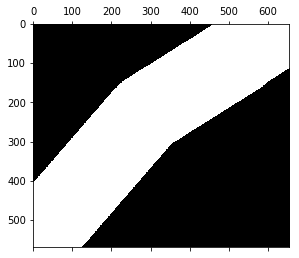

In [27]:
aa.plot()

### Tests nouvelles métriques

In [ ]:
pyplot.matshow(out)

In [ ]:
notnullcells = np.argwhere(out != 0)

In [ ]:
distance_raster = np.empty_like(out)
distance_raster = np.expand_dims(distance_raster, axis=2)

In [ ]:
distance_raster = np.empty_like(out)
distance_raster = np.expand_dims(distance_raster, axis=2)

it = np.nditer(out, flags=['multi_index'])

while not it.finished:
    # Calcul de la distance au plus proche voisin
    dist = np.sqrt(np.sum(np.square(notnullcells - it.multi_index), axis=1))
    np.insert(distance_raster[it.multi_index], dist, axis=2)

In [ ]:
azimut_raster = np.empty_like(out)

In [ ]:
it = np.nditer(out, flags=['multi_index'])

while not it.finished:
    # Calcul de la distance au plus proche voisin
    az = 

In [ ]:
class FuzzyficationFunction(list):

    ftypes = {
        2: 'linear',
        3: 'triangular',
        4: 'trapezoidal'
    }
    
    def __init__(self, *args):
        super().__init__(*args)
        sorted(self, key=lambda x: x[0])

        self.ftype = self.ftypes[len(self)]

In [ ]:
FuzzyficationFunction([(5, 1.0), (10, 0.0)]).ftype